In [30]:
import os
path = os.getcwd()

if path[1:5] == 'Home':
    %run /Home/siv30/wad005/master/GRB/src/harvest_matlab_data.ipynb
    %run /Home/siv30/wad005/master/GRB/src/background_rates.ipynb
    %run /Home/siv30/wad005/master/GRB/src/dau_det_distribution.ipynb
else:
    %run /Users/andreas/phys/master/GRB/src/harvest_matlab_data.ipynb
    %run /Users/andreas/phys/master/GRB/src/background_rates.ipynb
    %run /Users/andreas/phys/master/GRB/src/dau_det_distribution.ipynb


all UiB paths loaded

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!

all UiB paths loaded

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!
convert_erg.ipynb loaded successfully!

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!
convert_erg.ipynb loaded successfully!
safety_time.ipynb loaded successfully!

all UiB paths loaded

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!

all UiB paths loaded

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!
convert_erg.ipynb loaded successfully!

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!

all UiB paths loaded
read_mat

In [34]:
df_harvest = harvest_data(fn='2018_7_20_14_21_47',T0='2018-07-20T14:21:47.389')

dau/det starting from index 1
tus array given in seconds


tus array OK ...


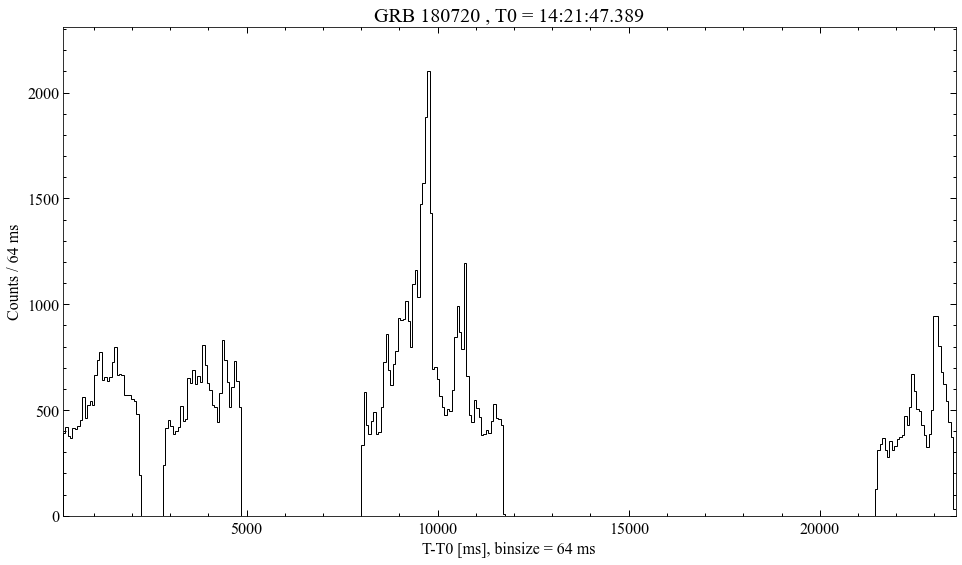

In [37]:
#can't estimate the background on this. have to use accumulated spectra
plot_HED(tus_arr=df_harvest['tus'].to_numpy(),binsize=64,T0=datetime.fromisoformat('2018-07-20T14:21:47.389'))

In [33]:
def harvest_data(fn=None,T0=None):
    data = scipy.io.loadmat(path_m+fn)['out_data']
    df = pd.DataFrame(data=data)
    df.rename(columns={0:'year',1:'month',2:'day',3:'hour',4:'minute',5:'second',6:'erg',7:'dau',8:'det'},inplace=True)
    df = df.convert_dtypes()
    dt_column = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']].astype(dtype=str))
    df['datetime'] = dt_column
    T0 = datetime.fromisoformat(T0)
    tus = df['datetime']-T0
    df['tus'] = tus
    df['tus'] = df['tus'].dt.total_seconds()
    df['dau'] = df['dau'].to_numpy()+1 #index starting now at 1
    df['det'] = df['det'].to_numpy()+1 #index starting now at 1
    df = make_adr(df)
    
    df.sort_values(by=['adr','tus'],inplace=True,ignore_index=True)
    print('dau/det starting from index 1')
    print('tus array given in seconds')
    
    tus,erg,dau,det = df['tus'].to_numpy(),df['erg'].to_numpy(),df['dau'].to_numpy(),df['det'].to_numpy()
    keV,abc = convert_erg(erg,dau,det,T0)
    df['keV'] = keV
    df['tus'] = df['tus'].to_numpy()*1e6

    st,dt = get_st(df),get_dt(df)
    df['st']=st
    df['dt']=dt
    return df
'''
    flag = get_flag(df)
    df['flag']=flag
    print('safety time: ',np.round((len(np.where(flag==True)[0])/len(flag))*100,3), '% removed')
    df.drop(labels=np.where(flag==True)[0],inplace=True)
    df.sort_values(by='tus',inplace=True,ignore_index=True)
    df['tus'] = df['tus'].to_numpy()/1e6
    print('tus given in seconds')
    return df '''

"\n    flag = get_flag(df)\n    df['flag']=flag\n    print('safety time: ',np.round((len(np.where(flag==True)[0])/len(flag))*100,3), '% removed')\n    df.drop(labels=np.where(flag==True)[0],inplace=True)\n    df.sort_values(by='tus',inplace=True,ignore_index=True)\n    df['tus'] = df['tus'].to_numpy()/1e6\n    print('tus given in seconds')\n    return df "